In [3]:
from domutil.util import *
import subprocess
did2node = pk_load('hashcath')
# tm,oms = pk_load('1200seq')

/home/shouldsee/.local/lib/python2.7/site-packages/Bio/SearchIO/__init__.py:211: BiopythonExperimentalWarning: Bio.SearchIO is an experimental submodule which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)


In [8]:
# l = 400
l = 1200
_ = np.random.seed(0)
# idx = np.random.randint(0,len(data),l )
# idxD = list2dict(idx)
# pen = 0 
# L = l * (l-1)/2
_ = np.random.seed(0)
# tdata = [data[i] for i in idx]

INPUT = list()
for i,head in hash2did.values():
    did = p_cathFAheader.findall(head)[0]
    INPUT += [(i,did2node[did])]
l = len(INPUT)
    # INPUT = hash2did
it = itertools.combinations( INPUT,2 )
# it = itertools.combinations( data[:l],2 )
def f2(obj):
    x,y = obj
    v = x[-1] == y[-1]
    return ( (x[0],y[0]), v)
import multiprocessing as mp
pool = mp.Pool(12)
# res = pool.apply_async(f, it)      # runs in *only* one process
# print res.get(timeout=1)              # prints "400"
res = pool.map(f2, it)
pool.close()
pool.join()
OUTPUT = scipy.sparse.dok_matrix( ( l, l), )
# OUTPUT.update( res )
OUTPUT.update({x:y for x,y in res})
tm = OUTPUT


NameError: name 'hash2did' is not defined

head -n 800 ./cath-dataset-nonredundant-S40.fa


In [21]:
# print os.environ['PATH']

/alt/applic/jupyter/bin:/alt/applic/jupyter/bin:/home/fg368/bin:/alt/bin:/usr/local/bin:/usr/local/sbin:/bin:/sbin:/usr/bin:/usr/sbin:.


In [7]:
num_T = mp.cpu_count()  
print num_T

64


In [12]:
%%time
import subprocess
import multiprocessing as mp

matDIR = 'submat/'
matlist = ['blosum62_logOFquot.mat',
'blosum62_quotOFlog.mat',
'blosum62_quotOFlog_atan.mat',
]
DIR = 'result'


fname = ftmp
import multiprocessing as mp
print ftmp
num_T = mp.cpu_count() - 1
# num_T = mp.cpu_count() - 1
num_T = 9


assert os.path.isdir(DIR),'Directory not found:"%s"'%DIR

for matname in matlist:
# for num_T in range(1,14,2):
#     matname = matlist[0]
    print num_T
    print matname
#     mat = 
    cmd = 'fasta36 %s %s -T%d -m10 -f0 -g0 -z1 -E0.01 -s %s' % (fname,
                                               fname,
                                                num_T,
                                                matDIR + matname)
    print cmd
    oname = os.path.join(DIR,fname  + '_%s.m10' % matname)
    # buf = open()
    with open(oname,'w') as outf:
        %time subprocess.check_call( cmd.split(), stdin=None, stdout=outf, stderr=None, shell=False)


./cath-dataset-nonredundant-S40.tmp
1
blosum62_logOFquot.mat
fasta36 ./cath-dataset-nonredundant-S40.tmp ./cath-dataset-nonredundant-S40.tmp -T1 -m10 -f0 -g0 -z1 -E0.01 -s submat/blosum62_logOFquot.mat
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 13.6 s
3
blosum62_logOFquot.mat
fasta36 ./cath-dataset-nonredundant-S40.tmp ./cath-dataset-nonredundant-S40.tmp -T3 -m10 -f0 -g0 -z1 -E0.01 -s submat/blosum62_logOFquot.mat
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 7.59 s
5
blosum62_logOFquot.mat
fasta36 ./cath-dataset-nonredundant-S40.tmp ./cath-dataset-nonredundant-S40.tmp -T5 -m10 -f0 -g0 -z1 -E0.01 -s submat/blosum62_logOFquot.mat
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 6.61 s
7
blosum62_logOFquot.mat
fasta36 ./cath-dataset-nonredundant-S40.tmp ./cath-dataset-nonredundant-S40.tmp -T7 -m10 -f0 -g0 -z1 -E0.01 -s submat/blosum62_logOFquot.mat
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 6.59 s
9
blosum62_logOFquot.mat
fasta36 ./cath-dataset-

In [7]:
import Bio.SeqIO
it = Bio.SeqIO.parse( fname,'fasta' )
hash2did = {}
# i = 0
for i,ent in enumerate(it):
    h = hash(ent.name) 
    hash2did[ h ] = (i,ent.name)

In [8]:
# with open(oname,'r') as f:
#     lines = f.readlines()
import Bio.SearchIO
it = Bio.SearchIO.parse( oname,'fasta-m10' )
# ent = next(it)
# ?ent
# hits = ent.__dict__['_items']

xs = []
ys = []
d  = {}

for ent in it:
#     print ent
    hits = ent.__dict__['_items']
    qid = hash(ent.id)
    for hit in hits.values():
        v = hit[0].bitscore
        jid = hash(hit.id)
        d[ ( qid, jid) ] = v

In [10]:
import scipy.sparse
l = len(hash2did)
om = scipy.sparse.dok_matrix( (l,l) )
order_d = { (hash2did[k[0]][0],
            hash2did[k[1]][0]):
           v for k,v in d.iteritems()
          }
om.update(order_d)

oms = [om]
# om = om.todense()


In [11]:
tm = tm.tocsr()
xss = []
yss = []
for om in oms[:]:
#     d = scipy.sparsere.dok_matrix( (l,l) )
#     d.update(
#         { (idxD[i],idxD[j]):v for (i,j),v in om.iteritems()}
#     )
#     om = d.tocsr()
    om = om.tocsr()
    thres = 1  
    xs = []
    ys = []
    it = np.linspace( om.min(), om.max(), 200)
    for thres in it:
        tp,fp = compare( om > thres ,tm)
        xs += [fp]
        ys += [tp] 
    xss += [xs]
    yss += [ys]

NameError: name 'tm' is not defined

In [39]:
pk_dump([tm,oms],'1200seq')


In [42]:
pk_dump(did2node,'hashcath')

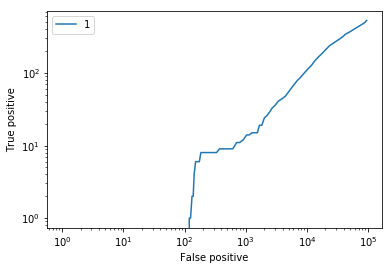

In [103]:
# compare(tm ,om)
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = plt.subplot(111)
ax1.set_xlabel('False positive')
ax1.set_ylabel('True positive')
ax1.set_xscale('log')
ax1.set_yscale('log')

lbl = 0
for xs,ys in izip(xss,yss):
    lbl += 1
    if lbl ==6:
        break
    ax1.plot(xs,ys, label = lbl)
# ax1.set_ylim(bottom = 40)
# ax1.set_ylim(bottom = 40)

ax1.legend()

# np.mean(tm.todense())

In [3]:
# import django_CATH.models 

# ll =  list( django_CATH.models.domain.objects.values_list('domain_id','hier__Class','hier__arch', 'hier__topo', 'hier__homsf'))
# dids = []
# sfs = []
# for i,c,a,t,h in ll:
#     dids.append(i)
#     sfs.append( (c,a,t,h) )
# hh_sfs = list2dict(set(sfs))
# sfs = [hh_sfs[x] for x in sfs]
# did2node = dict(zip(dids,sfs))

def compare( om, tm = None, thres = 0.5):
    tm = tm.tocsr()
    om = om.tocsr()
    tp = ((om + tm)  == 2).sum()
    fp = ((om - tm)  == 1).sum()
    return tp,fp,
# def GETcath_node(acc, domain_model = domain_model):
#     try:
#         # d = domain.objects.get(self.acc)
#         d = domain_model.objects.get( domain_id = acc)
#         node = d.superfamily()
#     except:
#         node = None
#     return node
from Bio.SubsMat import MatrixInfo as matlist
matrix = matlist.blosum62
?pairwise2.align.globaldx("KEVLA", "EVL", matrix)
xss = []
yss = []

# matrix
# for a in pairwise2.align.globaldx("KEVLA", "EVL", matrix):
#     print(format_alignment(*a))
#     Score=13


Object `pairwise2.align.globaldx` not found.


In [11]:
dmat = scipy.sparse.dok_matrix((23,23))
adict = list2dict( set(x for x,_ in mdct))
dct = { (adict[i],adict[j]):v for (i,j),v in mdct.items()}
dmat.update(dct)
dg = scipy.diag(scipy.diag(dmat.todense()))
dmat = (dmat + dmat.T - dg)/2.
plt.matshow(dmat.todense())
plt.matshow(dmat)
STD = dmat.std()
MIN = dmat.min()
MIN - STD

# dmat.items()


NameError: name 'mdct' is not defined

In [10]:
################ old routine ########################
# om.mean()
# tm.mean()
# fname = full("$SEQlib/cath-dataset-nonredundant-S40.fa")
with open(fname, 'r') as f:
    lines =  f.readlines()
seqs = []
sfs  = []
data = []
for i in range(0,len(lines),2):
    header = lines[i]
    seq = lines[i+1].rstrip('\n')
    acc = p_cathFAheader.findall(header)[0]
    if not acc in did2node:
        continue    
    sf = did2node[acc]
    data.append( (i//2,acc,sf,seq) ) 



NameError: name 'fname' is not defined

In [ ]:
dmat.mean()

In [231]:
# alist
# mdct
l = '    A      R      N      D      C      Q      E      G      H      I      L      K      M      F      P      S      T      W      Y      V  '.split()
[x for x in adict if x not in l]
# 
# ?hash((2,3,5,9))

['B', 'X', 'Z']

In [258]:
it = itertools.combinations( data[:50],2 )
list(batch_qs(list(it), (L //ncore + 1)).__len__()
?batch_qs

In [15]:
## URL: ftp://ftp.ncbi.nih.gov/repository/blocks/unix/blosum/BLOSUM/blosum62.out

s = '''
Frequencies = fij pairs (off-diagonals = 2*fij):
    A      R      N      D      C      Q      E      G      H      I      L      K      M      F      P      S      T      W      Y      V  
 10682.82 
  3034.87   8494.79 
  2677.36   2210.31   5606.34 
  2891.15   2068.86   3892.52   8992.11 
  1689.11    566.42    652.05    546.53   5057.53 
  2441.71   2812.23   1757.19   1933.64    417.90   3191.29 
  3837.90   3269.54   2524.00   5358.06    639.98   3670.58   7875.47 
  6935.48   2265.08   3479.11   3148.02    962.77   1843.05   2507.44  17597.50 
  1351.17   1439.05   1674.77   1250.48    317.89   1162.52   1416.43   1222.49   3554.27 
  3906.94   1654.55   1404.28   1357.79    935.28   1252.95   1674.21   1952.28    725.87   7798.61 
  5354.86   3141.84   1917.64   2041.07   1544.93   2093.64   2875.89   2964.24   1440.65  11576.47  16939.58 
  3689.71   7089.26   2983.71   2950.49    661.72   3194.38   4844.61   3118.43   1506.60   1934.51   2953.51   7241.46 
  1774.76    980.91    724.98    607.40    412.85    910.78    927.94   1042.21    510.32   2503.11   4648.35   1077.46   1595.24 
  2240.63   1317.72   1025.84    928.86    675.63    780.32   1379.43   1638.17    999.38   3397.82   6462.76   1380.05   1374.17   8552.17 
  2492.00   1258.01   1201.10   1661.25    409.72   1193.88   2156.68   2086.22    655.00   1491.83   1931.79   2013.28    605.18    823.20   9501.33 
  6916.08   2838.82   3540.37   3138.24   1227.18   2473.26   3299.41   4890.12   1346.91   2316.44   3234.27   3424.75   1102.55   1762.50   2057.56   6193.92 
  4365.37   2312.40   2852.92   2500.45   1076.15   1668.51   2725.77   2770.49    950.88   3251.22   4278.60   2882.78   1268.59   1617.45   1804.51   5250.78   5543.30 
   541.81    430.02    250.35    240.98    106.37    381.15    472.38    569.39    179.24    511.16    878.02    407.96    283.58    990.14    262.28    356.34    406.23   3282.03 
  1703.39   1444.85   1003.84    967.47    448.60    967.06   1372.64   1287.71   1447.71   1974.89   3061.73   1442.13    835.20   4351.38    714.27   1444.93   1364.06    902.82   4307.45 
  6063.16   2202.29   1631.30   1790.49   1456.31   1570.86   2182.23   2400.08    824.82  11956.78  10215.18   2441.76   2387.67   3336.68   1730.34   3257.51   4526.65    536.28   1965.96   9111.27 
  '''

def dmat2mdct(dmat, alist):
    dmat = scipy.sparse.dok_matrix(dmat)
#     try:
#         dmat = dmat.todense()
#     except:
#         pass
    dg = scipy.diag(scipy.diag(dmat.todense()))
    mdct ={ (alist[i],alist[j]):v for (i,j),v in dmat.iteritems()}
    return mdct
def mdct2dmat (mdct, ):
    adict = list2dict( set(x for x,_ in mdct))
    l = len(adict)
    dmat = scipy.sparse.dok_matrix((l,l))
    dct = { (adict[i],adict[j]):v for (i,j),v in mdct.items()}
    dmat.update(dct)
    dg = scipy.diag(scipy.diag(dmat.todense()))
    dmat = (dmat + dmat.T - dg)/2.
#     if dmat
    return dmat,adict

import matplotlib.pyplot as plt
lines  = s.splitlines()
alist  = lines[2].split()
adict = { v:i for i,v in enumerate(alist)};
OUTPUT = {}
for i0,line in enumerate(lines[3:]):    
#     print list( ((i0,i1):float(v)) for i1,v in enumerate(line.split()))
    OUTPUT.update({(i0,i1):float(v) for i1,v in enumerate(line.split())})
import scipy.sparse
# import scipy
m0 = scipy.sparse.dok_matrix( (23,23 ), 'float')
m0.update(OUTPUT)
m0 = m0.todense()
dg0 = np.diag(m0)
print adict['W']
m0[20,:] = m0[adict['W'],:] + m0[:,adict['W']].T
m0[21,:] = m0[adict['E'],:] + m0[:,adict['E']].T
m0[20,20] = dg0[adict['W']]
m0[21,21] = dg0[adict['E']]

idx = sorted([adict['W'],adict['E']])
m0[20,21] = m0[idx[0],idx[1]]
alist += ['Y','Z','X']
# adict['Y'] = 20
# adict['Z'] = 21
# adict['X'] = 22

# m0[22,:] = m0[m0>0].min()
# m0[adict['W'], 20] = np.sqrt(dg0[adict['W']])
# m0[adict['E'], 21] = np.sqrt(dg0[adict['W']])
# m0[adict['W'], 20] = np.sqrt(dg0[adict['W']])
plt.matshow(m0)
# m0[m0==0]


17


In [361]:
 mat1[:22,:22].min()

-6.5298722308177704

In [8]:
write_mat(mdct,)

mat5.shape

(23, 23)

In [106]:
# print 
import sys
import os
def dmat2mdct(dmat, alist):
    dmat = scipy.sparse.dok_matrix(dmat)
#     try:
#         dmat = dmat.todense()
#     except:
#         pass
    dg = scipy.diag(scipy.diag(dmat.todense()))
    mdct ={ (alist[i],alist[j]):v for (i,j),v in dmat.iteritems()}
    return mdct
def mdct2dmat (mdct, ):
    alist = list( set(x for x,_ in mdct) )
    adict = list2dict( alist)
    l = len(adict)
    dmat = scipy.sparse.dok_matrix((l,l))
    dct = { (adict[i],adict[j]):v for (i,j),v in mdct.items()}
    dmat.update(dct)
    dg = scipy.diag(scipy.diag(dmat.todense()))
    dmat = (dmat + dmat.T - dg)/2.
    alist = [None] * len(adict)
#     if dmat
    return dmat,alist

# for row_label, row in zip(row_labels, x):
#     print '%s [%s]' % (row_label, ' '.join('%03s' % i for i in row))

def savemat(fname, dmat, alist, DIR = 'submat'):
    assert os.path.isdir(DIR),'[Error]: No such directory "%s"' % DIR
    with open( os.path.join(DIR,fname) ,'w+') as fout:
#         print >>fout,'   ',
#         fout.write(' ')
#         print >>fout,' %04s'.join(alist)
        print >>fout,'  %04s' % ''.join('%04s' % i for i in alist)
        dmat = np.array(dmat.astype('int'))
#         buf = '%s' % ( np.array(mat1.astype('int')))
#         lines = buf.splitlines()
#         for line,a in zip(lines,alist):
#             print >>fout,' %s'%a,
#             l = line.strip().strip('[').strip(']')
#             print >> fout,l
            
        for line,a in zip( dmat,alist):
            print >>fout, ' %s%s' %(a,
                                     ''.join('%04s' % i for i in line)
                                    )

        fout.seek(0)
        print fout.read()
# savemat('tmpmat',mat2,alist)
savemat('tmpmat',mat2 * scale,alist)
# np.set_printoptions?

class submat(object):
    def __init__(self, mat,  alist = None, alias = 'tmpmat',):
        self.fname = alias+'.mat'
        if not alist:
            if isinstance(mat,dict):
                mat, alist = mdct2dmat( mat )
            else:
                raise Exception('single argument must be a dict')
        else:
            pass
        self.mat = mat
        self.alist = alist
    def savemat(self,):
        savemat(self.fname, self.mat, self.alist)
#     break

     A   R   N   D   C   Q   E   G   H   I   L   K   M   F   P   S   T   W   Y   V   Y   Z   X
 A  28  -2  -1  -2   2   0  -2   5  -2  -1  -2  -1   1  -4  -1   8   3  -8  -3   3  -8  -2   0
 R  -2  36   1  -2  -5   7   0  -5   3  -7  -4  15  -1  -6  -4   0   0  -7   0  -5  -7   0   0
 N  -1   1  33   9  -2   3   0   3   7  -6  -7   3  -2  -6  -2   6   4  -9  -2  -6  -9   0   0
 D  -2  -2   9  38  -6   1   8  -1   1  -9  -9   0  -6  -9  -1   1   0 -12  -5  -7 -12   8   0
 C   2  -5  -2  -6  55  -4  -7  -3  -3  -2  -1  -5   0  -2  -6   1   1 -10  -3   1 -10  -7   0
 Q   0   7   3   1  -4  27   7  -2   5  -5  -4   7   2  -7   0   3   0  -4   0  -4  -4   7   0
 E  -2   0   0   8  -7   7  25  -7   0  -9  -9   4  -4  -8  -1   0  -1  -8  -4  -8  -8  25   0
 G   5  -5   3  -1  -3  -2  -7  46  -2  -9  -9  -2  -4  -7  -2   3  -2  -7  -5  -8  -7  -7   0
 H  -2   3   7   1  -3   5   0  -2  42  -6  -3   2   0   0  -2   0  -1  -7   9  -6  -7   0   0
 I  -1  -7  -6  -9  -2  -5  -9  -9  -6  28  14  -6

In [108]:
dg =  np.diag(np.diag(m0))
m0 = (m0 + m0.T) / 2

fmat = m0
marfs = m0.sum(axis = 1)
lmarfs = np.log10(marfs)
pmat = fmat.copy() / sum(marfs)

marps = pmat.sum(axis = 1)
lmarps = np.log10(marps)
npmat = pmat.copy() / marps.T /marps

mat1 = (10 * np.log10(npmat))
mat1[22,:] =  mat1[:22,:22].mean()
mat1[:,22] =  mat1[:22,:22].mean()

mat2 =  10 * (lmarps + lmarps.T) / np.log10(pmat.copy())
mat2[22,:] =  mat2[:22,:22].mean()
mat2[:,22] =  mat2[:22,:22].mean()
mat2 = mat2 - mat2.mean()
mat2 = mat2 / mat2.std()

mat3 =  np.arctan((lmarps + lmarps.T) / np.log10(pmat.copy()))
mat3[22,:] =  mat3[:22,:22].min()
mat3[:,22] =  mat3[:22,:22].min()
mat3 = mat3 - mat3.mean()
mat3 = mat3 / mat3.std()

mat4 =  scipy.matrix(np.random.normal( mat2.mean(), mat2.std(), 23**2))
mat4 = mat4.reshape(23,23)
mdct = dmat2mdct(mat3,alist)

mat5 = mat1.copy()
mat5 = mat5 - mat5.mean() 
mat5 = mat5 / mat5.std()  + 0.00001

scale = 6
savemat('blosum62_logOFquot.mat',mat5 * scale,alist)
savemat('blosum62_quotOFlog.mat',mat2 * scale,alist)
savemat('blosum62_quotOFlog_atan.mat',mat3 * scale,alist)


# mat5[22,:] =  mat5[:22,:22].mean()
# mat5[:,22] =  mat5[:22,:22].mean()


# mat4 =  np.log10(fmat.copy())/(lmarfs + lmarfs.T)
# mat4[22,:] =  mat4[:22,:22].mean()
# mat4[:,22] =  mat4[:22,:22].mean()

mdct = matlist.blosum62
mat0,_ = mdct2dmat(mdct) 

%matplotlib inline
plt.matshow(mat0)
plt.matshow(mat1)
plt.matshow(mat2)
plt.matshow(mat4)



mdcts = [
    matlist.blosum62,
]
mdcts  = [
    dmat2mdct( dmat,alist ) for dmat in 
    [mat1,mat2,mat3,mat4,mat5]
]
# mdcts.append()
# mats = 
# plt.matshow(mat3)
# plt.matshow(mat4)


     A   R   N   D   C   Q   E   G   H   I   L   K   M   F   P   S   T   W   Y   V   Y   Z   X
 A  14   0   0   0   2   0   0   4   0   0   0   0   1  -2   0   6   2  -6  -1   3  -6   0   0
 R   0  18   1   0  -4   5   1  -2   2  -4  -2   9   0  -3  -2   1   0  -5   0  -2  -5   1   0
 N   0   1  18   6  -1   3   0   3   6  -3  -4   3  -1  -4  -1   5   4  -8  -1  -3  -8   0   0
 D   0   0   6  18  -4   2   5   0   1  -6  -5   1  -4  -6   0   2   1 -10  -3  -4 -10   5   0
 C   2  -4  -1  -4  30  -3  -5  -2  -2  -1   0  -3   0  -1  -4   1   1 -10  -2   1 -10  -5   0
 Q   0   5   3   2  -3  16   5  -1   4  -3  -2   5   2  -5   0   3   0  -3   0  -2  -3   5   0
 E   0   1   0   5  -5   5  13  -3   0  -6  -4   3  -2  -5   0   0   0  -6  -2  -4  -6  13   0
 G   4  -2   3   0  -2  -1  -3  19  -1  -5  -5   0  -2  -4   0   3   0  -5  -3  -4  -5  -3   0
 H   0   2   6   1  -2   4   0  -1  24  -4  -2   2   0   0  -1   1   0  -6   7  -4  -6   0   0
 I   0  -4  -3  -6  -1  -3  -6  -5  -4  14   8  -3

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in divide
  # This is added back by InteractiveShellApp.init_path()
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encou

AttributeError: 'list' object has no attribute 'blosum62'

In [14]:
mdct = matlist.blosum62
dmat,adict = mdct2for mdct in mdcts:
dmat(mdct )
STD = dmat.std()
MIN = dmat.min()
MIN + STD


plt.matshow(dmat)
# dmat = (dmat + dmat.T - dg)/2.
print adict
plt.matshow(dmat)
dmat[21:].mean()
'Y' is 'W'
'Z' is 'E'
# dmat.mean()

{'A': 0, 'C': 1, 'B': 2, 'E': 3, 'D': 4, 'G': 5, 'F': 6, 'I': 7, 'H': 8, 'K': 9, 'M': 10, 'L': 11, 'N': 12, 'Q': 13, 'P': 14, 'S': 15, 'R': 16, 'T': 17, 'W': 18, 'V': 19, 'Y': 20, 'X': 21, 'Z': 22}


False

In [82]:
del xss[-1]
del yss[-1]

In [ ]:
from Bio.SubsMat import MatrixInfo as matlist
mdct = matlist.blosum62


In [14]:
# l = 400
# l = 50
l = 1200

_ = np.random.seed(0)
idx = np.random.randint(0,len(data),l )
idxD = list2dict(idx)
pen = 0 
L = l * (l-1)/2
_ = np.random.seed(0)
tdata = [data[i] for i in idx]
it = itertools.combinations( tdata,2 )
# it = itertools.combinations( data[:l],2 )
def f2(obj):
    x,y = obj
    v = x[2] == y[2]
    return ((idxD[x[0]],idxD[y[0]]), v)
import multiprocessing as mp
pool = mp.Pool(12)
# res = pool.apply_async(f, it)      # runs in *only* one process
# print res.get(timeout=1)              # prints "400"
res = pool.map(f2, it)
pool.close()
pool.join()
OUTPUT = scipy.sparse.dok_matrix( ( l, l), )
# OUTPUT.update( res )
OUTPUT.update({x:y for x,y in res})
tm = OUTPUT

In [87]:
%load_ext line_profiler
np.random.seed(0)


In [109]:
idx = np.random.randint(0,len(data),l )
print idx

[ 6921  6036  2163 ..., 10971  5570 14819]


In [ ]:
idx = np.random.randint(0, len(data),l )
idx.dtype
# data[idx]
# len()data
[data[i] for i in idx]

In [146]:
import sys
reload(Bio)

<module 'Bio' from '/home/shouldsee/.local/lib/python2.7/site-packages/Bio/__init__.pyc'>

In [17]:
# %%time 
import Bio
import Bio.pairwise2

def f(obj, ):
    (x,y),args,idxD = obj
#     args = [args[0]]
    a = Bio.pairwise2.align.globalds(
#     a = Bio.pairwise2.align.localds(        
#     a = Bio.pairwise2.align.globaldx(
                x[-1], y[-1], 
                                one_alignment_only = 1,
                                     *args
                                    )
    v = float(a[0][2]) / (a[0][-1] -  a[0][-2] + 1)
#     v = a[0][2]
    return (idxD[x[0]],idxD[y[0]]),v

def test(l):
    _ = np.random.seed(0)
    idx = np.random.randint(0,len(data),l )
    idxD = list2dict(idx)
    pen = 0 
    L = l * (l-1)/2
    tdata = [data[i] for i in idx]
    it = itertools.combinations( tdata,2 )
    it = itertools.izip(it,
        [[mdct,pen,pen],] * L,
                       [idxD]*L)
#     res = []
#     for i in it:
#         res.append( f(i) )
                      
    import multiprocessing as mp
    pool = mp.Pool(12)
    # res = pool.apply_async(f, it)      # runs in *only* one process
    # print res.get(timeout=1)              # prints "400"
    res = pool.map(f, it, )
    pool.close()
    OUTPUT = scipy.sparse.dok_matrix( ( l, l), )
    # OUTPUT.update( res )
    OUTPUT.update( {x:y for x,y in res})
    om = OUTPUT  
    return om

# %lprun -f f 
%time om = test(50)
# %lprun -f pairwise2._align test(100)
# import Bio
# %lprun -f Bio.cpairwise2._make_score_matrix_fast test(10)
# %lprun -f Bio.pairwise2._make_score_matrix_fast test(10)
# %lprun -f Bio.pairwise2._make_score_matrix_generic test(10)
# %lprun -f Bio.pairwise2._align test(10)
# %lprun -f test test(100)
# %lprun -f pool.map_async test(100)

CPU times: user 60 ms, sys: 72 ms, total: 132 ms
Wall time: 3.47 s


In [34]:
# 1000**2 / 250**2
om.items()[:20]

[((5, 31), 0.5374522056255212),
 ((27, 46), 0.6311323607122103),
 ((21, 28), 0.5854278924225736),
 ((4, 36), 0.6418174349476797),
 ((17, 20), 0.6588502139540938),
 ((7, 25), 0.5929761690957431),
 ((29, 44), 0.5814303625333572),
 ((33, 41), 0.5590781781390732),
 ((16, 47), 0.6755045026262563),
 ((12, 42), 0.6641884494462952),
 ((13, 32), 0.3748919523188812),
 ((18, 45), 0.6332597892102955),
 ((38, 40), 0.601345267506467),
 ((15, 30), 0.5122363352653009),
 ((11, 22), 0.6823319127710794),
 ((8, 26), 0.5494759896987504),
 ((1, 28), 0.6914627267731112),
 ((13, 20), 0.6013777187727495),
 ((30, 41), 0.6458394416462502),
 ((25, 49), 0.6541430863195539)]

In [42]:
%%time
oms = []
l = 1200
for mdct in mdcts:
    om = test( l ) 
    oms.append( om )
    print 'finished'

finished
finished
finished
finished
CPU times: user 41.6 s, sys: 8.63 s, total: 50.2 s
Wall time: 1h 38min 38s


In [20]:
ts,oms = pk_load('1200seq')

In [25]:
%%time
# oms = []
l = 1200
# for mdct in mdcts:
if 1:
    mdct = mdcts[-1]
    om = test( l ) 
    oms.append( om )
    print 'finished'

finished
CPU times: user 10.3 s, sys: 1.65 s, total: 12 s
Wall time: 23min 57s


In [79]:
%%time
from Bio import pairwise2
# d1 = {}
# pairwise2.align.globalds(x[-1], y[-1], mdct, -1, -1 )

l = 250
# pen = MIN 
pen = 0 
L = l * (l-1)/2

it = itertools.combinations( data[:l],2 )
i = 0
c = counter(it, per = 50)
it = itertools.combinations( data[:l],2 )
it = itertools.izip(it,
                    [[mdct,pen,pen]] * L, )

def f(obj, ):
    (x,y),args = obj
    a = pairwise2.align.globalds(x[-1], y[-1], 
                                one_alignment_only = 1, *args)
    v = float(a[0][2]) / (a[0][-1] -  a[0][-2] + 1)
#     v = a[0][2]
    return (x[0],y[0]),v

# for x,y in it:
#     i += 1
#     v = pairwise2.align.globalds(x[-1], y[-1], mdct, -1, -1 )
#     d1[(x[0],y[0])] = v 
#     c.count()


import multiprocessing as mp
pool = mp.Pool(12)
# res = pool.apply_async(f, it)      # runs in *only* one process
# print res.get(timeout=1)              # prints "400"
res = pool.map(f, it, )
pool.close()
#     print 
#     print x[0]
#     print y[0]
#     break
OUTPUT = scipy.sparse.dok_matrix( ( l, l), )
# OUTPUT.update( res )
OUTPUT.update({x:y for x,y in res})
om = OUTPUT    
# len(data)

CPU times: user 340 ms, sys: 156 ms, total: 496 ms
Wall time: 55.9 s


In [181]:
m = tm.copy()
tm = om.copy()
om = m.copy()

In [190]:
tm.items()[:10]

[((19171, 13592), False),
 ((11052, 13173), False),
 ((19608, 16979), False),
 ((9845, 20701), False),
 ((732, 12232), False),
 ((10327, 18068), False),
 ((10959, 5661), False),
 ((8717, 6004), False),
 ((3091, 15912), False),
 ((15115, 894), False)]

In [134]:
from Bio import pairwise2, SubsMat
# alignments = pairwise2.align.globalxx("ACCGT", "ACG")
# alignments
from Bio.SubsMat import MatrixInfo as matlist
mdct = matlist.blosum62

# mdct = SubsMat.Matrixinfo.blosum62
a = pairwise2.align.globalds(x[-1], y[-1], mdct, -1, -1 ) 
# a = pairwise2.align.globaldx([x[-1],x[-1]], [y[-1]], mdct, -1, -1 ) 
# ?a
# ?pairwise2.align.globalds
# a[2]
# a[0][2]

# a[0][2] / (a[0][-1] -  a[0][-2] + 1)

# a
# ?pairwise2.align.globalds

380

In [47]:
import django_CATH.models 

ll =  list( django_CATH.models.domain.objects.values_list('domain_id','hier__Class','hier__arch', 'hier__topo', 'hier__homsf'))
dids = []
sfs = []
for i,c,a,t,h in ll:
    dids.append(i)
    sfs.append( (c,a,t,h) )
hh_sfs = list2dict(set(sfs))
sfs = [hh_sfs[x] for x in sfs]
did2node = dict(zip(dids,sfs))

def compare( om, tm = None, thres = 0.5):
    tm = tm.tocsr()
    om = om.tocsr()
    tp = ((om + tm)  == 2).sum()
    fp = ((om - tm)  == 1).sum()
    return tp,fp,
# def GETcath_node(acc, domain_model = domain_model):
#     try:
#         # d = domain.objects.get(self.acc)
#         d = domain_model.objects.get( domain_id = acc)
#         node = d.superfamily()
#     except:
#         node = None
#     return node

In [6]:
def compare( om, tm = None, thres = 0.5):

    tm = tm.tocsr()
    om = om.tocsr()

    tp = ((om + tm)  == 2).sum()
    fp = ((om - tm)  == 1).sum()

    return tp,fp,
# tn,fn
# # compare( OUTPUT > .5, sfbools )
# dc = wrap_mat(OUTPUT,sfbools)

# xs = []
# ys = []
# for thres in np.linspace(0,1.,50):
#     tp,fp = compare( tm > thres, om  )
#     xs.append( tp )
#     ys.append( fp )

# print "Done"

In [67]:
%%time
reset_database_connection()
##########################################################
##########################################################
#### Thresholding the hit4hmm2hspPR ######################
#### and cache stats into hit4cath2cath ##################
#### Model: hit4hmm2hspPR --> hit4cath2cath ##############
##########################################################
# self = matObj
matObj = ctmat(
    Cver = Cver,
    sDB=sDB,
    alias = '%s_%s' %(Cver,sDB.name),
    letter = 'S',
)


# qset = matObj.filter_and_mask()

# filter_and_mask(matObj)
# Draw_hitPR(matObj,dump = 1)

# matObj.hit_sum(dump = 1)      #### summing hit-seq count for each hmmprofile
# matObj.MySQL_hcount() #### put hit-seq count to MySQL database
# # matObj.force = 1
# matObj.Dnorm( dump = 1)
# matObj.Dgeoavg( dump = 1)
# matObj.Dboth(dump = 1)
# matObj.to_MySQL()
# print matObj.reverse_dict

CPU times: user 128 ms, sys: 0 ns, total: 128 ms
Wall time: 439 ms
